<a href="https://colab.research.google.com/github/sh0w0911/SJSU_CMPE_181/blob/main/CMPE181_MLIntro2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris() #https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.datasets.load_iris.html
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
X.shape

(150, 2)

In [3]:
Y.shape

(150,)

In [4]:
logreg = LogisticRegression()#(C=1e5)
# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
print([x_min, x_max, y_min, y_max])
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
print(xx.shape)
print(yy.shape)

[3.8, 8.4, 1.5, 4.9]
(171, 231)
(171, 231)


In [6]:
newxxyy=np.c_[xx.ravel(), yy.ravel()] #https://numpy.org/devdocs/reference/generated/numpy.c_.html#:~:text=numpy.,because%20of%20its%20common%20occurrence.
newxxyy.shape

(39501, 2)

In [7]:
Z = logreg.predict(newxxyy)
Z.shape

(39501,)

In [8]:
from sklearn.metrics import classification_report
y_afterpred=logreg.predict(X)
print(classification_report(Y, y_afterpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.74      0.73        50
           2       0.73      0.72      0.73        50

    accuracy                           0.82       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.82      0.82      0.82       150



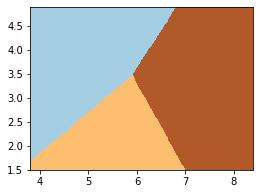

In [9]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

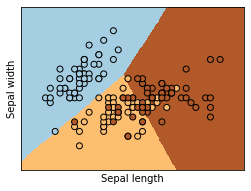

In [10]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knclass = KNeighborsClassifier(3)
# Create an instance of Logistic Regression Classifier and fit the data.
knclass.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
Z = knclass.predict(newxxyy)#mesh grid
Z.shape

(39501,)

In [13]:
from sklearn.metrics import classification_report
y_afterpred=knclass.predict(X)
print(classification_report(Y, y_afterpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.82      0.72      0.77        50
           2       0.75      0.84      0.79        50

    accuracy                           0.85       150
   macro avg       0.86      0.85      0.85       150
weighted avg       0.86      0.85      0.85       150



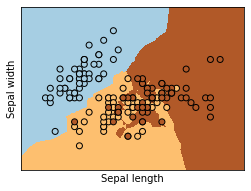

In [14]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Fetch data from Bigquery


In [15]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [16]:
%load_ext google.colab.data_table

In [17]:
project_id = 'helical-client-308405'
!gcloud config list project

[core]
project (unset)

Your active configuration is: [default]


In [18]:
!gcloud config set project 'helical-client-308405'

Updated property [core/project].


In [19]:
from google.cloud import bigquery

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'helical-client-308405'
client = bigquery.Client(project=project_id)

In [20]:
sql = """
SELECT
    *
FROM
    `bigquery-public-data.ml_datasets.census_adult_income`
"""
dfquery = client.query(sql)
df_census=dfquery.to_dataframe()
df_census.head(200)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,74141,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,178215,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,86958,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,176012,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,33,Private,262439,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,>50K
196,31,Private,196788,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
197,47,Private,151267,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,15024,0,40,United-States,>50K
198,35,Private,148903,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,16,United-States,>50K


In [21]:
print(len(df_census))

32561


In [22]:
df_census.dtypes

age                   int64
workclass            object
functional_weight     int64
education            object
education_num         int64
marital_status       object
occupation           object
relationship         object
race                 object
sex                  object
capital_gain          int64
capital_loss          int64
hours_per_week        int64
native_country       object
income_bracket       object
dtype: object

Feature Extraction 

In [24]:
df_census_sex=df_census['sex']
df_census_sex.head()

0     Female
1     Female
2     Female
3     Female
4     Female
Name: sex, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
gender = LabelEncoder()
gender.fit(df_census_sex)
print(gender.classes_)

[' Female' ' Male']


In [26]:
# transform a simple simulation data
print(gender.transform([
    ' Female', ' Female', ' Male', ' Female', ' Male'
]))

[0 0 1 0 1]


In [27]:
#In order to create a multicolumn LabelEncoder, we’ll have to extend the TransformerMixin in Scikit-Learn to create a transformer class of our own
from sklearn.base import BaseEstimator, TransformerMixin
class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns  = columns
        self.encoders = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])
        return output

In [28]:
numeric_columns = df_census.select_dtypes(['int64']).columns
numeric_columns

Index(['age', 'functional_weight', 'education_num', 'capital_gain',
       'capital_loss', 'hours_per_week'],
      dtype='object')

In [29]:
# Convert integer valued (numeric) columns to floating point
df_census[numeric_columns] = df_census[numeric_columns].astype('float32') # change to float

In [30]:
df_census.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,Private,297847.0,9th,5.0,Married-civ-spouse,Other-service,Wife,Black,Female,3411.0,0.0,34.0,United-States,<=50K
1,72.0,Private,74141.0,9th,5.0,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0.0,0.0,48.0,United-States,>50K
2,45.0,Private,178215.0,9th,5.0,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0.0,0.0,40.0,United-States,>50K
3,31.0,Private,86958.0,9th,5.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
4,55.0,Private,176012.0,9th,5.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,23.0,United-States,<=50K


In [31]:
cat_columns = df_census.select_dtypes(['object']).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income_bracket'],
      dtype='object')

In [32]:
test = LabelEncoder()
test.fit(df_census[cat_columns[0]])
print(test.classes_)

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [33]:
test.fit(df_census[cat_columns[1]])
print(test.classes_)

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


In [34]:
test.fit(df_census[cat_columns[2]])
print(test.classes_)

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']


In [35]:
test.fit(df_census[cat_columns[3]])
print(test.classes_)

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [36]:
test.fit(df_census[cat_columns[4]])
print(test.classes_)

[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']


In [37]:
test.fit(df_census[cat_columns[5]])
print(test.classes_)

[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']


In [38]:
test.fit(df_census[cat_columns[7]])
print(test.classes_)

[' ?' ' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'
 ' Dominican-Republic' ' Ecuador' ' El-Salvador' ' England' ' France'
 ' Germany' ' Greece' ' Guatemala' ' Haiti' ' Holand-Netherlands'
 ' Honduras' ' Hong' ' Hungary' ' India' ' Iran' ' Ireland' ' Italy'
 ' Jamaica' ' Japan' ' Laos' ' Mexico' ' Nicaragua'
 ' Outlying-US(Guam-USVI-etc)' ' Peru' ' Philippines' ' Poland'
 ' Portugal' ' Puerto-Rico' ' Scotland' ' South' ' Taiwan' ' Thailand'
 ' Trinadad&Tobago' ' United-States' ' Vietnam' ' Yugoslavia']


In [39]:
encoder = EncodeCategorical(cat_columns)
df_census_encoded = encoder.fit_transform(df_census)
df_census_encoded.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39,0
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39,1
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,1
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39,0
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39,0


In [40]:
df_census.isnull().sum()

age                  0
workclass            0
functional_weight    0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income_bracket       0
dtype: int64

In [41]:
cat_columns[7]

'native_country'

In [42]:
cat_columns[3]

'occupation'

In [43]:
cat_columns[0]

'workclass'

In [44]:
from sklearn.impute import SimpleImputer
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

class ImputeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """
    def __init__(self, columns=None):
        self.columns = columns
        self.imputer = None
    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to impute.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns
        # Fit an imputer for each column in the data frame
        self.imputer = SimpleImputer(missing_values=0, strategy='most_frequent')
        self.imputer.fit(data[self.columns])
        return self
    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        output[self.columns] = self.imputer.transform(output[self.columns])
        return output


In [45]:
imputer = ImputeCategorical(['workclass', 'native_country', 'occupation'])
df_census_encoded = imputer.fit_transform(df_census_encoded)

In [46]:
df_census_encoded.head(50)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39,0
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39,1
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,1
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39,0
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39,0
5,30.0,4,61272.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,32,0
6,46.0,5,161386.0,6,5.0,2,1,5,4,0,0.0,0.0,50.0,39,0
7,28.0,4,209801.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39,0
8,37.0,4,171090.0,6,5.0,2,7,5,2,0,0.0,0.0,48.0,39,0
9,40.0,2,183096.0,6,5.0,2,8,5,4,0,0.0,0.0,40.0,41,1


In [47]:
target=df_census_encoded['income_bracket']
target.head()

0    0
1    1
2    1
3    0
4    0
Name: income_bracket, dtype: int64

In [48]:
df_census_encoded=df_census_encoded.drop(columns=['income_bracket'])
df_census_encoded.head()

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39.0,4,297847.0,6,5.0,2,8,5,2,0,3411.0,0.0,34.0,39
1,72.0,4,74141.0,6,5.0,2,4,5,1,0,0.0,0.0,48.0,39
2,45.0,4,178215.0,6,5.0,2,7,5,4,0,0.0,0.0,40.0,39
3,31.0,4,86958.0,6,5.0,2,4,5,4,0,0.0,0.0,40.0,39
4,55.0,4,176012.0,6,5.0,2,13,5,4,0,0.0,0.0,23.0,39


Perfrom Classification


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_census_encoded, target, train_size = 0.7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((22792, 14), (9769, 14), (22792,), (9769,))

In [50]:
from sklearn.linear_model import LogisticRegression
lgreg=LogisticRegression(max_iter=200)
lgreg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
y_pred=lgreg.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      7433
           1       0.66      0.36      0.47      2336

    accuracy                           0.80      9769
   macro avg       0.74      0.65      0.67      9769
weighted avg       0.79      0.80      0.78      9769



In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

roc_auc_score:  0.6515788475218803
f1 score:  0.46729490022172954


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(X_train, Y_train)
y_pred = knclassifier.predict(X_test)

#print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))
print("roc_auc_score: ", roc_auc_score(Y_test, y_pred))
print("f1 score: ", f1_score(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7433
           1       0.54      0.31      0.39      2336

    accuracy                           0.77      9769
   macro avg       0.67      0.61      0.63      9769
weighted avg       0.74      0.77      0.75      9769

roc_auc_score:  0.6131681030908076
f1 score:  0.3931391233324258
